In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import  ModelCheckpoint


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/fer2013.csv')

width, height = 48, 48

datapoints = data['pixels'].tolist()
X = []
for pixel in datapoints:
    temp = [int(i) for i in pixel.split(' ')]
    temp = np.asarray(temp).reshape(width, height,1)
    X.append(temp.astype('float32')/255)

X = np.asarray(X)

y=tf.keras.utils.to_categorical(data['emotion'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_test.shape)
print(X_train.shape)

(3589, 48, 48, 1)
(32298, 48, 48, 1)


In [ ]:

BATCH_SIZE=128

train_datagen = ImageDataGenerator(
  
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator()

train_datagen.fit(X_train)
val_datagen.fit(X_train)

train_flow = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
val_flow = val_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE, shuffle=False)


In [ ]:


model=Sequential()
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu", input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', kernel_initializer='he_normal', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(2048, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['categorical_accuracy'])


In [ ]:

checkpoint_acc = ModelCheckpoint('cnn_model.h5', verbose=1, monitor='val_categorical_accuracy',save_best_only=True, mode='max')

history = model.fit_generator(
        train_flow, 
        epochs=120, 
        validation_data=val_flow,
        verbose =1 ,
        callbacks = [checkpoint_acc]
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/120
253/253 [==============================] - ETA: 0s - loss: 1.8358 - categorical_accuracy: 0.2508
Epoch 1: val_categorical_accuracy improved from -inf to 0.26639, saving model to cnn_model.h5
253/253 [==============================] - 118s 376ms/step - loss: 1.8358 - categorical_accuracy: 0.2508 - val_loss: 1.7847 - val_categorical_accuracy: 0.2664
Epoch 2/120
253/253 [==============================] - ETA: 0s - loss: 1.6156 - categorical_accuracy: 0.3680
Epoch 2: val_categorical_accuracy improved from 0.26639 to 0.41043, saving model to cnn_model.h5
253/253 [==============================] - 91s 360ms/step - loss: 1.6156 - categorical_accuracy: 0.3680 - val_loss: 1.6844 - val_categorical_accuracy: 0.4104
Epoch 3/120
253/253 [==============================] - ETA: 0s - loss: 1.4654 - categorical_accuracy: 0.4382
Epoch 3: val_categorical_accuracy improved from 0.41043 to 0.46675, saving model to cnn_model.h5
253/253 [==============================] - 90s 356ms/step - loss: 1.

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


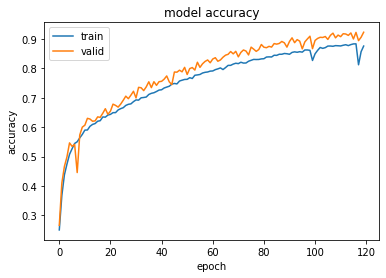

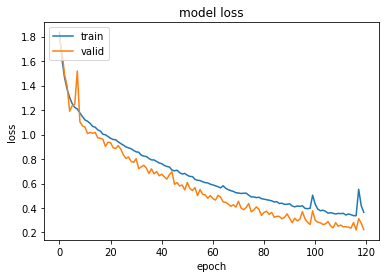

(32298, 48, 48, 1)

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
X_train.shape

In [ ]:

scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

113/113 [==============================] - 4s 32ms/step - loss: 1.1256 - categorical_accuracy: 0.6994
Testing Accuracy: 69.94%



In [ ]:
#modelden tahminini alıyoruz
y_pred=model.predict(X_test,verbose=1)

113/113 [==============================] - 4s 28ms/step


array([[4.2312723e-02, 4.6290155e-04, 4.3537904e-02, ..., 7.1247299e-03,
        2.2195334e-02, 3.1365443e-03],
       [1.4058856e-05, 2.1767742e-07, 1.3080692e-04, ..., 1.9264959e-04,
        4.4353065e-04, 9.5972745e-03],
       [3.8121133e-03, 2.0128236e-05, 8.4507871e-01, ..., 1.7150044e-03,
        1.4837657e-01, 2.7414985e-04],
       ...,
       [7.4326522e-03, 5.5490847e-05, 6.0511231e-01, ..., 2.7132328e-03,
        3.7872794e-01, 6.3924940e-04],
       [1.1654756e-03, 1.4464931e-07, 2.5368873e-03, ..., 5.8293339e-02,
        8.2843246e-05, 8.9414889e-01],
       [4.4075758e-08, 9.9793502e-13, 2.3475447e-07, ..., 6.1835766e-07,
        2.5574383e-07, 3.0357071e-05]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score
from imblearn.metrics import specificity_score

y_all_predict = [np.argmax(i) for i in y_pred]
print(y_all_predict[17])


y_all_predict=tf.keras.utils.to_categorical(y_all_predict)
print(y_all_predict[17])
print(y_test[17])

4
[0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0.]


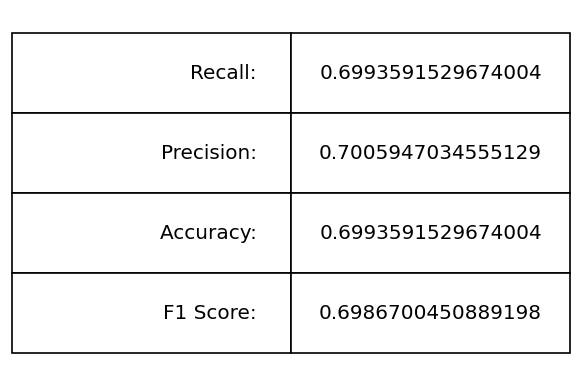

In [ ]:

fig = plt.figure(dpi=120)
ax = fig.add_subplot(1,1,1)
table=[
    ["Recall: ", recall_score(y_test, y_all_predict ,average='weighted')],
    ["Precision: ", precision_score(y_test, y_all_predict,average='weighted')],
    ["Accuracy: ", accuracy_score(y_test, y_all_predict)],
    #["Specificity: ", specificity_score(y_test, y_all_predict)],
    ["F1 Score: ", f1_score(y_test, y_all_predict,average='weighted')],
]
table = ax.table(cellText=table, loc='center')
table.set_fontsize(16)
table.scale(1,4)
ax.axis('off')
plt.show()

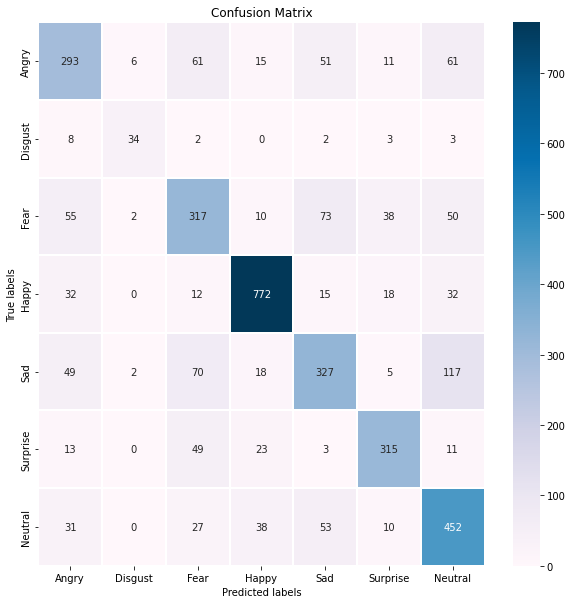

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score
from imblearn.metrics import specificity_score

T5_lables = ['Angry','Disgust','Fear','Happy','Sad', 'Surprise', 'Neutral']
plt.figure(figsize=(10,10))
ax= plt.subplot()

cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_all_predict).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap="PuBu",linewidths=1); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);